In [1]:
# Supervised Regression
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Data
data = pandas.read_csv('./data/james_river_data.txt',
                       comment="#",
                       sep='\t',
                       dtype={"discharge_cfs": int, "flow_rate_ft": float}
                      )
data = data.drop(index=0) # Drop the one time record with metadata under the headers
data['datetime'] = pandas.to_datetime(data['datetime'])
data = data.rename(columns = {"147077_00060": "discharge_cfs", 
                              "147077_00060_cd": "discharge_read_type",
                              "147078_00065": "flow_rate_ft",
                              "147078_00065_cd": "flow_rate_read_type"})

# Clean data
print(f"Before filtering we have {len(data.index)} records")
data = data.dropna()
print(f"After filtering we have {len(data.index)} records")

data = data.loc[data['flow_rate_read_type'] == 'A'] # Remove 'P' == predicted values from the future
data = data.loc[data['discharge_read_type'] == 'A'] # Remove 'P' == predicted values from the future

# Convert types
data = data.convert_dtypes()
data = data.astype({"discharge_cfs": int, "flow_rate_ft": float})

/Users/brianskarda/Library/Caches/pypoetry/virtualenvs/model-CDSBhTbK-py3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Before filtering we have 382942 records
After filtering we have 381670 records


In [3]:
# Derive some new variables
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
supervised_regression_data = data[["month", "day", "flow_rate_ft"]]

In [4]:
train_input, test_input, train_output, test_output = train_test_split(supervised_regression_data[["month", "day"]],
                                                                      supervised_regression_data["flow_rate_ft"])

In [5]:
train_input.head()

,month,day
246253,7,11
248620,8,4
200972,3,26
359221,10,10
310220,5,18


In [6]:
train_output.head()

246253    4.01
248620    3.63
200972    5.70
359221    4.40
310220    6.34
Name: flow_rate_ft, dtype: float64

In [7]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(train_input, train_output)

dt_score = dt_model.score(test_input, test_output)
print(f"accuracy {dt_score}")

accuracy 0.28436552953786287


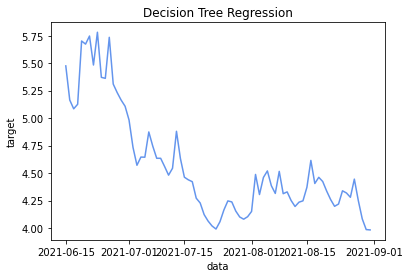

In [8]:
test_dates = pandas.date_range(start='2021-06-15', end='2021-08-31')
test_dates = pandas.DataFrame(test_dates)
test_dates["month"] = test_dates[0].dt.month
test_dates["day"] = test_dates[0].dt.day
test_dates.head()
dt_predictions = dt_model.predict(test_dates[["month", "day"]])

# Plot the results
plt.figure()

plt.plot(test_dates[0], dt_predictions, color="cornflowerblue", label="predictions")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()